In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt



## **Loading Test And Train data**

In [52]:
test_data = pd.read_csv("/kaggle/input/data-test/SalaryData_Test.csv")
train_data = pd.read_csv("/kaggle/input/data-train/SalaryData_Train.csv")

In [53]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [55]:

train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Separate features and labels

In [56]:
train_features = train_data.iloc[:, :-1]
train_labels = train_data.iloc[:, -1]
test_features = test_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1]

### **Convert categorical variables to numerical using one-hot encoding**

In [57]:
train_features = pd.get_dummies(train_features)
test_features = pd.get_dummies(test_features)

### **Initialize Naive Bayes classifier**

In [58]:
classifier = GaussianNB()

### **Train the classifier on the training data**

In [59]:
classifier.fit(train_features, train_labels)

GaussianNB()

In [60]:
# Predict the labels for the test data
predicted_labels = classifier.predict(test_features)

### **Calculate the accuracy of the model**

In [61]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

# Calculate precision
precision = precision_score(test_labels, predicted_labels, pos_label=' <=50K')

# Calculate recall
recall = recall_score(test_labels, predicted_labels, pos_label=' <=50K')

# Calculate F1 score
f1 = f1_score(test_labels, predicted_labels, pos_label=' <=50K')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8029216467463479
Precision: 0.9301824892351855
Recall: 0.7986795774647887
F1 Score: 0.8594297622430613


### Create confusion matrix


In [62]:
cm = confusion_matrix(test_labels, predicted_labels)

In [66]:
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



### **Plot the confusion matrix**

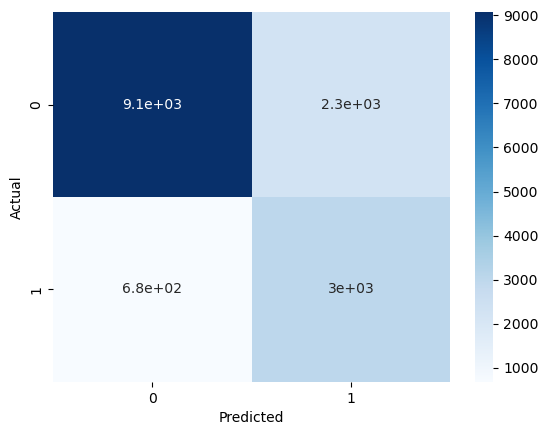

In [63]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()